# 2. Heart Disease Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import dataset
data = pd.read_csv('HeartDiseaseDataset.csv')       
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#info
data.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#description 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.shape

(303, 14)

# Checking null values

In [6]:
# Checking null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.notnull().sum()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

# Data Cleaning and Preprocessing

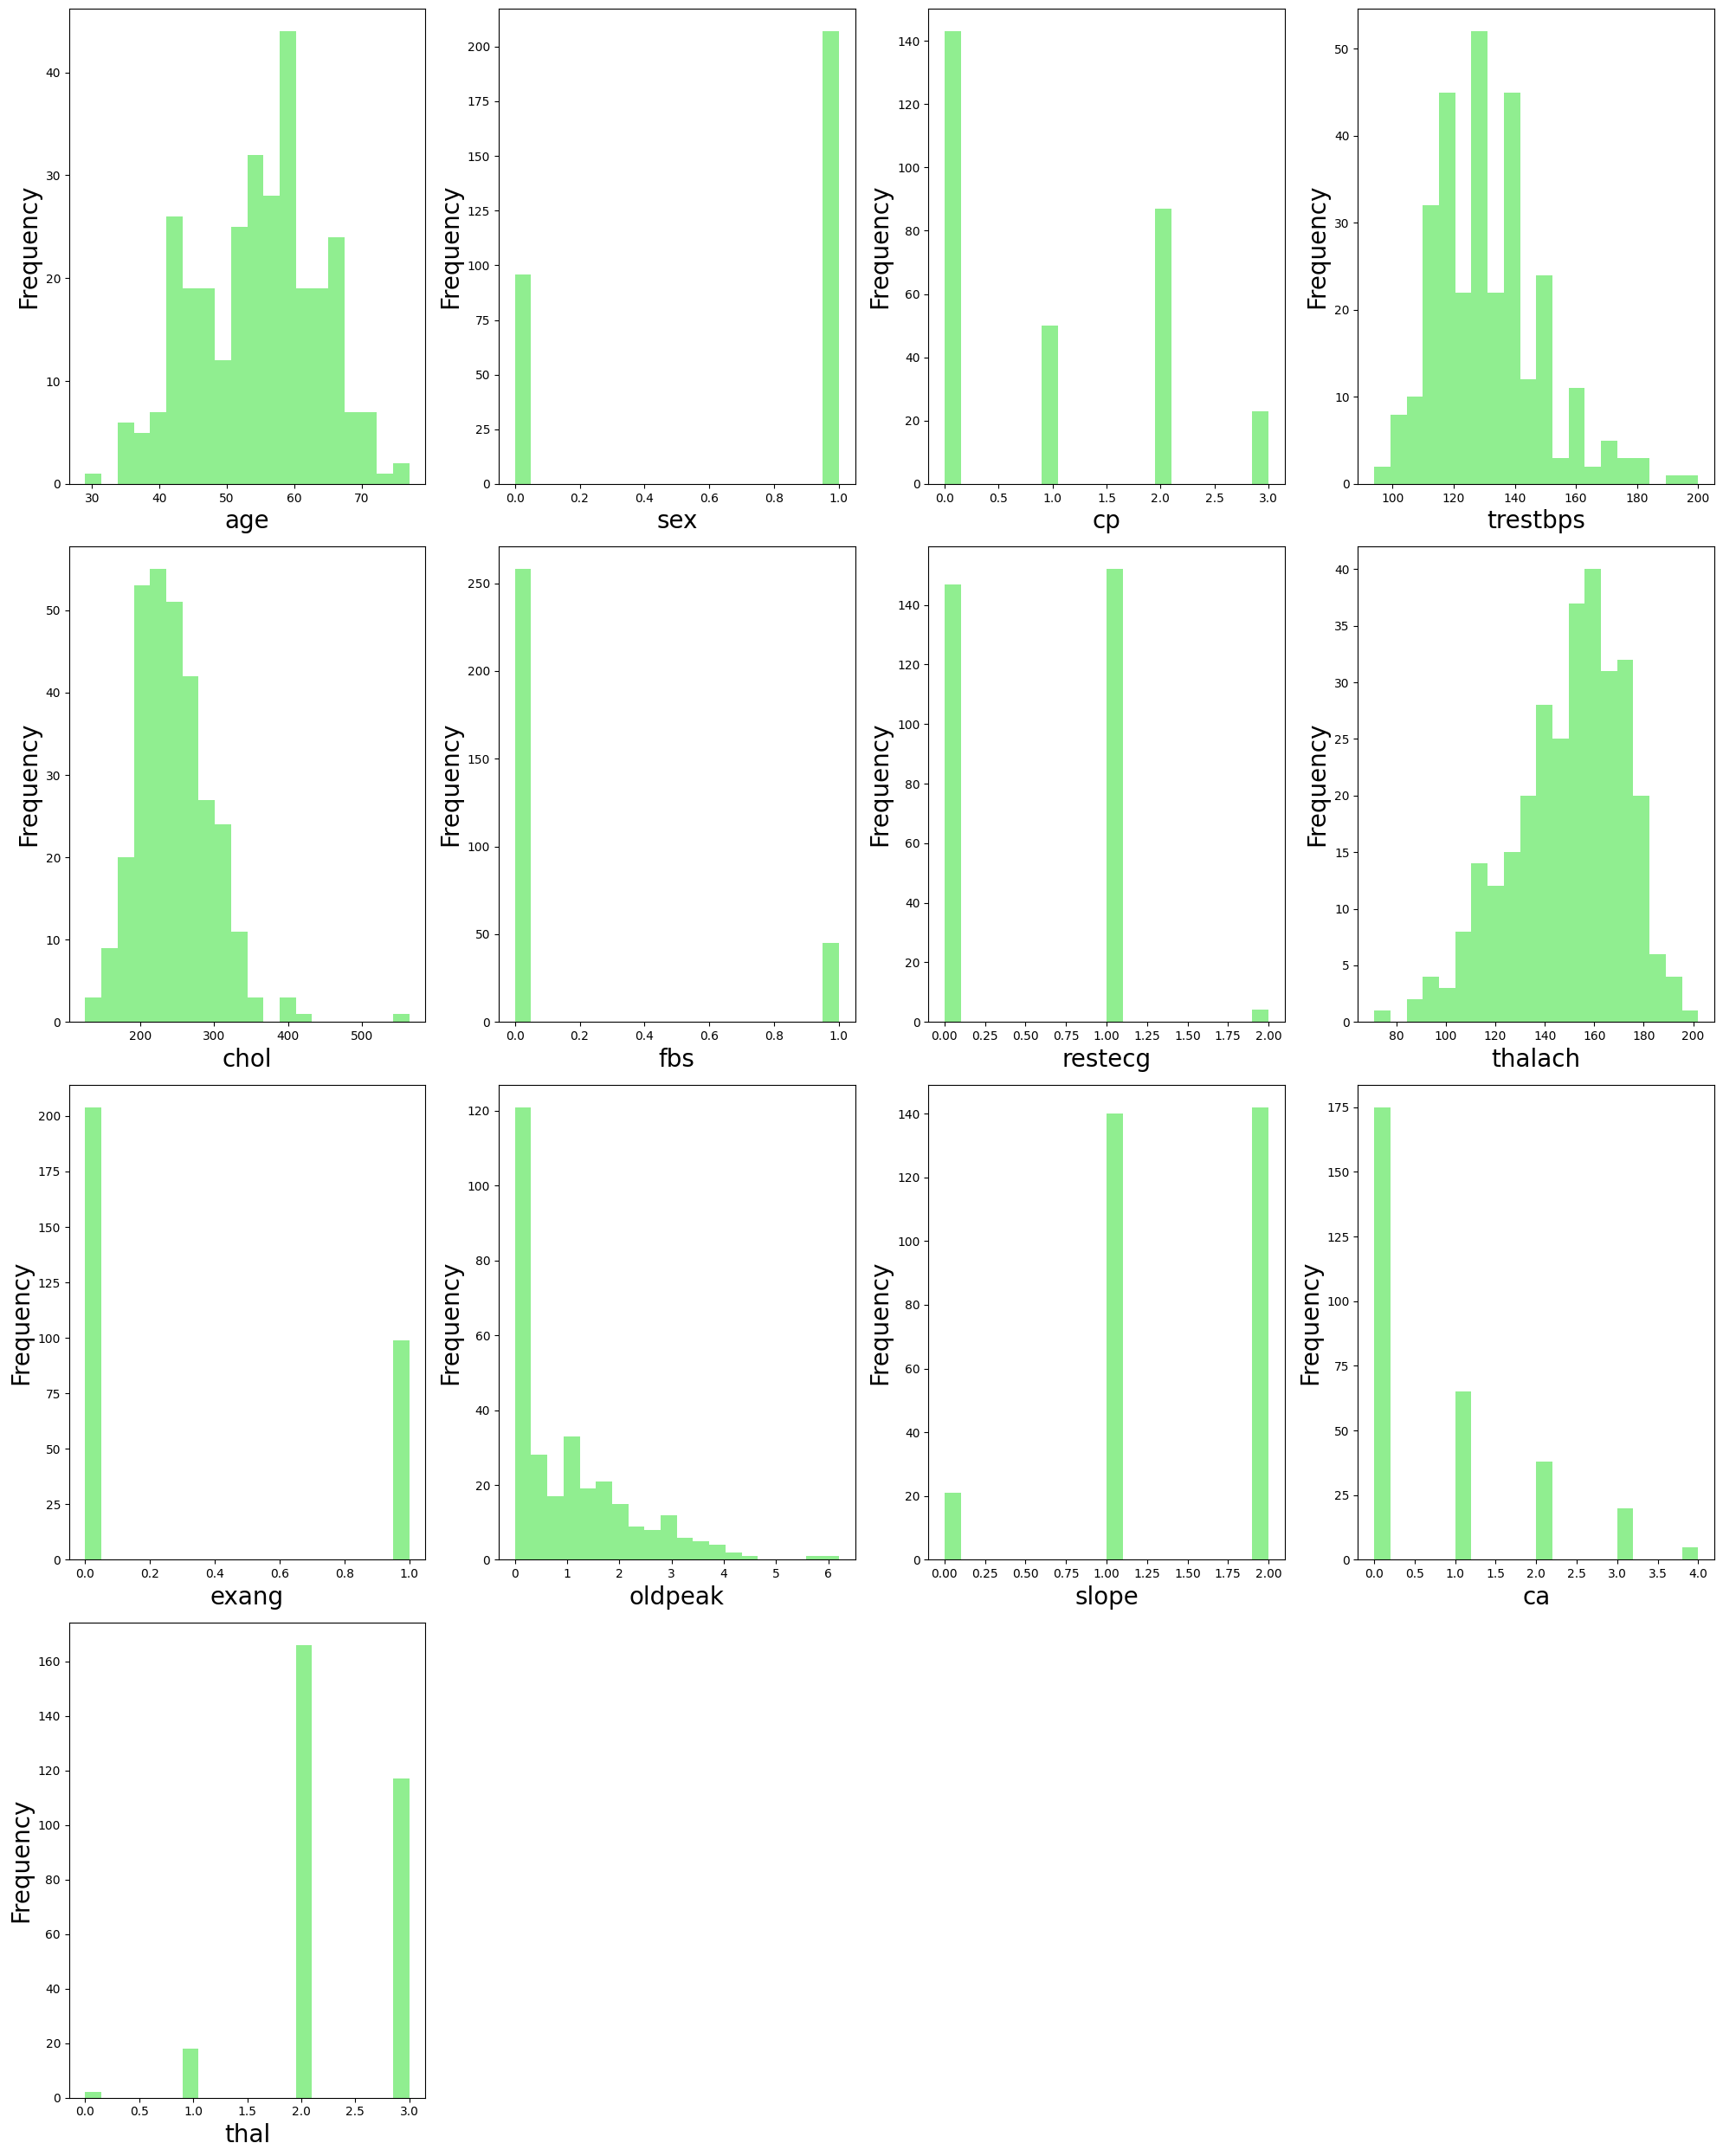

In [8]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data:
    if plotnumber < 14:
        ax = plt.subplot(4, 4, plotnumber)
        plt.hist(data[column], bins=20, color='lightgreen') 
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Frequency', fontsize=20)  
    plotnumber += 1

plt.tight_layout()  
plt.show()


In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


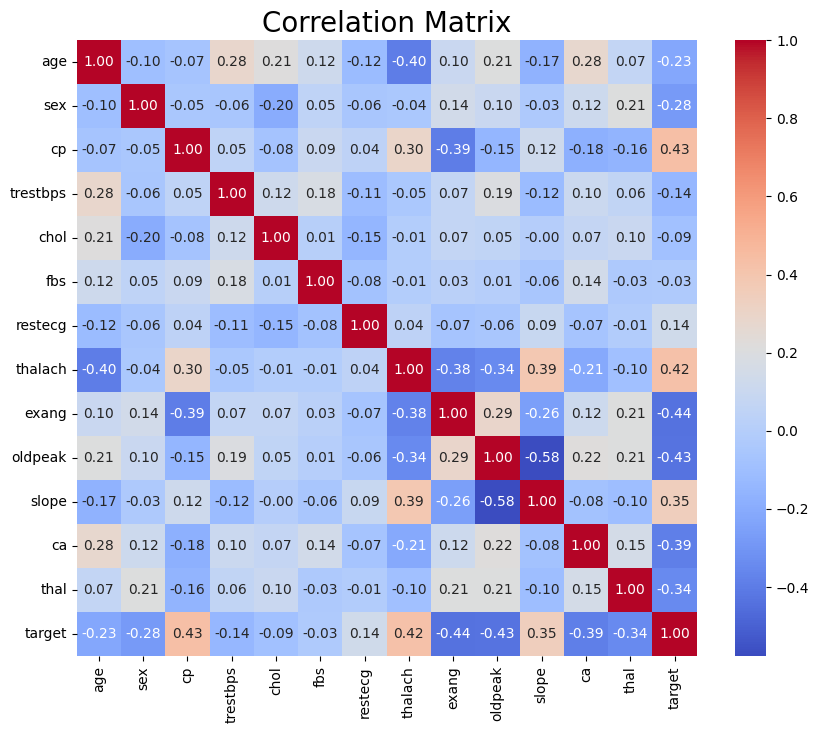

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [11]:
data.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
x=data.drop('target',axis=1)    
y=data['target']

In [14]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


# Logistic Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [17]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [18]:
# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

In [19]:
# Train the logistic regression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
# Predictions on training data
train_predictions = logistic_regression_model.predict(X_train_scaled)
train_accuracy = accuracy_score(train_predictions, y_train)
train_f1 = f1_score(train_predictions, y_train)

In [21]:
# Predictions on testing data
test_predictions = logistic_regression_model.predict(X_test_scaled)
test_accuracy = accuracy_score(test_predictions, y_test)
test_f1 = f1_score(test_predictions, y_test)

In [22]:
# Evaluate the model
train_loss = logistic_regression_model.score(X_train_scaled, y_train)
test_loss = logistic_regression_model.score(X_test_scaled, y_test)

In [23]:
# Print results
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Training Loss:", train_loss)
print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)
print("Testing Loss:", test_loss)

Training Accuracy: 0.8632075471698113
Training F1 Score: 0.8816326530612245
Training Loss: 0.8632075471698113
Testing Accuracy: 0.8131868131868132
Testing F1 Score: 0.8316831683168316
Testing Loss: 0.8131868131868132


In [24]:
log_train = train_accuracy
log_test = test_accuracy
log_trainf1 = train_f1
log_testf1 = test_f1

In [25]:
input_data = np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1]).reshape(1, -1)
input_data_scaled = scaler.transform(input_data)
prediction = logistic_regression_model.predict(input_data_scaled)

if prediction == 1:
    print("Presence of Disease")
else:
    print("Not a patient")


Presence of Disease


In [28]:
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, test_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# KNearestNeighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier


In [30]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [31]:
# Train the classifier
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
# Predictions on training data
train_predictions = knn_classifier.predict(x_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print('Training Accuracy:', train_accuracy)
knn_train = train_accuracy


Training Accuracy: 0.7783018867924528


In [33]:
# Predictions on testing data
test_predictions = knn_classifier.predict(x_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print('Testing Accuracy:', test_accuracy)
knn_test = test_accuracy

Testing Accuracy: 0.6703296703296703


In [34]:
input_data = np.array([63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]).reshape(1, -1)
prediction = knn_classifier.predict(input_data)
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

The person has heart disease.


In [35]:
print("KNearestNeighbors Classification Report:")
print(classification_report(y_test, test_predictions))

KNearestNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        44
           1       0.67      0.72      0.69        47

    accuracy                           0.67        91
   macro avg       0.67      0.67      0.67        91
weighted avg       0.67      0.67      0.67        91



# SVM

In [36]:
from sklearn.svm import SVC


In [37]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [38]:
# Predictions on training data
train_predictions = svm_classifier.predict(x_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print('Training Accuracy:', train_accuracy)
svm_train = train_accuracy

Training Accuracy: 0.8537735849056604


In [39]:
# Predictions on testing data
test_predictions = svm_classifier.predict(x_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print('Testing Accuracy:', test_accuracy)
svm_test = test_accuracy


Testing Accuracy: 0.8131868131868132


In [40]:
input_data = np.array([63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]).reshape(1, -1)
prediction = svm_classifier.predict(input_data)
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

The person has heart disease.


In [41]:
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, test_predictions))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier



In [43]:
# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
# Predictions on training data
train_predictions = decision_tree_classifier.predict(x_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print('Training Accuracy:', train_accuracy)
decision_train = train_accuracy

Training Accuracy: 1.0


In [45]:
# Predictions on testing data
test_predictions = decision_tree_classifier.predict(x_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print('Testing Accuracy:', test_accuracy)
decision_test = test_accuracy

Testing Accuracy: 0.7142857142857143


In [46]:
input_data = np.array([63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]).reshape(1, -1)
prediction = decision_tree_classifier.predict(input_data)
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

The person has heart disease.


In [47]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, test_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        44
           1       0.74      0.68      0.71        47

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier


In [49]:
# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Predictions on training data
train_predictions = random_forest_classifier.predict(x_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print('Training Accuracy:', train_accuracy)
randomforest_train = train_accuracy


Training Accuracy: 1.0


In [51]:
# Predictions on testing data
test_predictions = random_forest_classifier.predict(x_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print('Testing Accuracy:', test_accuracy)
randomforest_test = test_accuracy

Testing Accuracy: 0.8461538461538461


In [52]:
input_data = np.array([63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]).reshape(1, -1)
prediction = random_forest_classifier.predict(input_data)
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

The person has heart disease.


In [53]:
print("Random Forest Classification Report:")
print(classification_report(y_test, test_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.80      0.94      0.86        47

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



## Neural Networks

In [54]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [55]:

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [56]:
# Initialize the neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_dim=X_train_scaled.shape[1]))

In [57]:
# Add second hidden layer
model.add(Dense(units=8, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

In [58]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 0.6868 - accuracy: 0.5189
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5472
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.5755
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6085
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6651
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7123
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7358
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7406
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.7594
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7689
Epoch 11/50
7/7 [======================

In [59]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
print('Training Accuracy:', train_accuracy)
nn_train = train_accuracy

Training Accuracy: 0.900943398475647


In [60]:
# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Testing Accuracy:', test_accuracy)
nn_test = test_accuracy

Testing Accuracy: 0.8571428656578064


In [62]:
print("Neural Network Classification Report:")
print(classification_report(y_test, test_predictions))

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.80      0.94      0.86        47

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



In [63]:
input_data = np.array([63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]).reshape(1, -1)
input_data_scaled = scaler.transform(input_data)
prediction = model.predict(input_data_scaled)
if prediction[0][0] < 0.5:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

1/1 [==============================] - 0s 20ms/step
The person has heart disease.


In [64]:
accuracies = {
    'Logistic Regression' : log_test,
    'KNN': knn_test,
    'SVM': svm_test,
    'Decision Tree': decision_test,
    'Random Forest': randomforest_test,
    'Neural Network': nn_test
}

# Create a DataFrame from the accuracies dictionary
accuracy = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
print(accuracy)

                 Model  Accuracy
0  Logistic Regression  0.813187
1                  KNN  0.670330
2                  SVM  0.813187
3        Decision Tree  0.714286
4        Random Forest  0.846154
5       Neural Network  0.857143


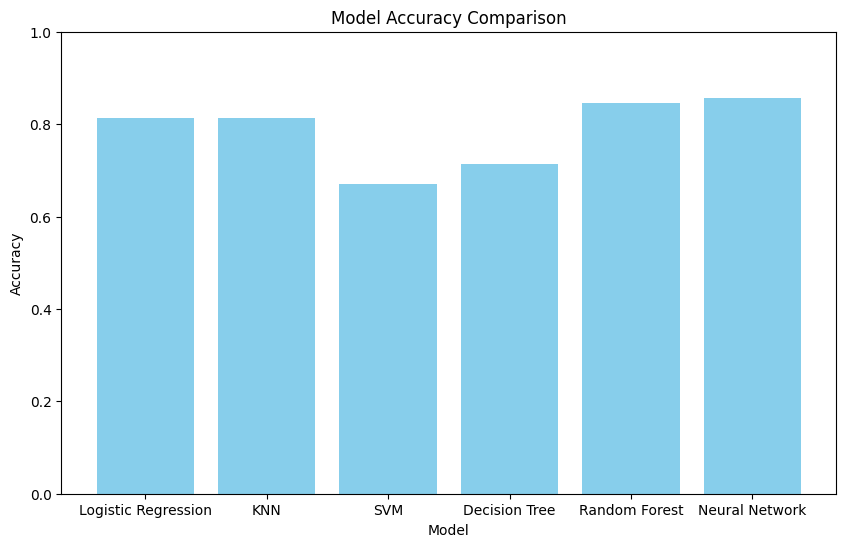

In [65]:
models = ['Logistic Regression','KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Neural Network']
accuracies = [log_test, svm_test, knn_test, decision_test, randomforest_test, nn_test]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1) 
plt.show()

In [66]:
import pickle
model = random_forest_classifier
pickle.dump(model, open("HeartDiseaseModel.pkl",'wb'))